In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from random import seed
from random import randrange
from random import random
from math import exp

In [3]:
df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['Income'] = df['Income'].replace(0,df['Income'].mean())
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

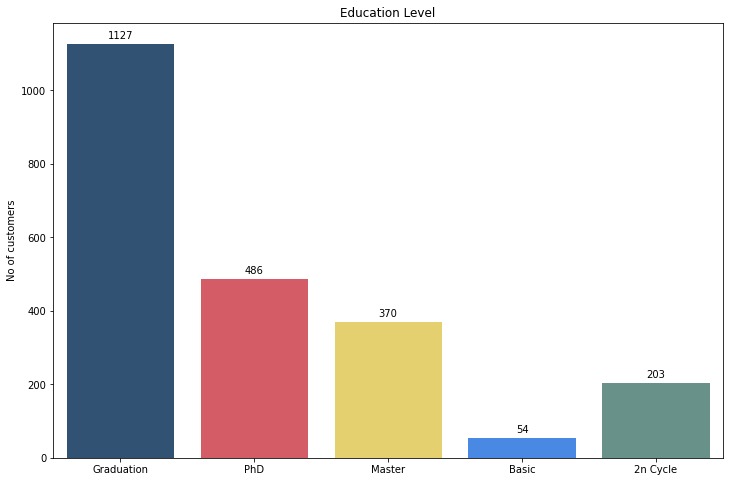

In [7]:
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
plt.figure(figsize=(12,8))
plots=sns.countplot(x='Education',data=df,palette=color)
plt.ylabel('No of customers')
plt.title('Education Level')
plt.xlabel('')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0,8),
                       textcoords='offset points')

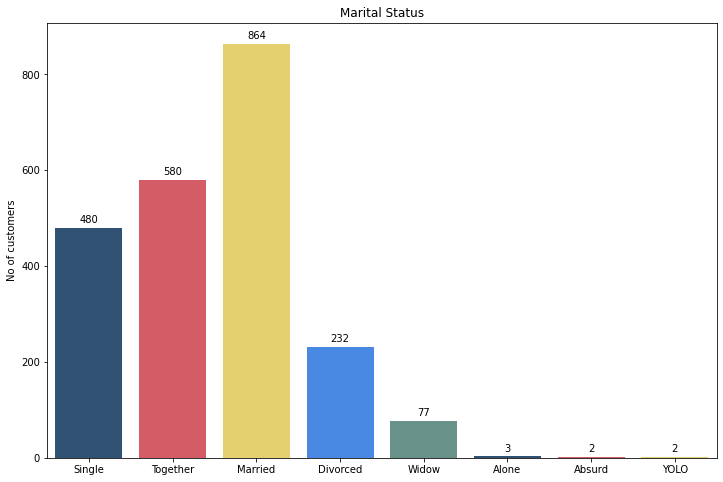

In [8]:
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
plt.figure(figsize=(12,8))
plots=sns.countplot(x='Marital_Status',data=df,palette=color)
plt.ylabel('No of customers')
plt.title('Marital Status')
plt.xlabel('')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0,8),
                       textcoords='offset points')

In [9]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],2)
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced','Widow'],1)
df['Marital_Status'] = df['Marital_Status'].replace(['Single', 'Alone', 'YOLO', 'Absurd'],0)
df['Education'] = df['Education'].map({'Basic':1,'Graduation':2,'2n Cycle':3,'Master':4,'PhD':5})

df['Age'] = 2021-df['Year_Birth']

df["Income"]=round(df["Income"],-4)
df["Income"]=df["Income"].astype(int)

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Customers_for'] = (df['Dt_Customer'].max()-df['Dt_Customer']).dt.days
df['Customers_for']=(df['Customers_for']/30).astype(int)

In [11]:
col_del = ["AcceptedCmp1" , "ID","Dt_Customer","AcceptedCmp2","Complain", "Year_Birth","Z_CostContact","AcceptedCmp3" , "Z_Revenue","AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)


Text(0.5, 1.0, 'Distribution of Age')

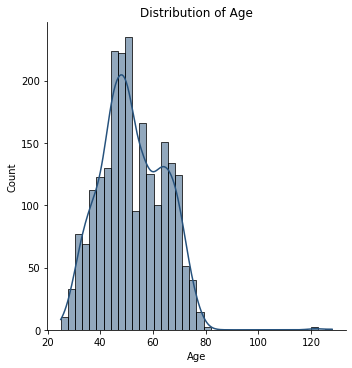

In [12]:
sns.displot(data=df,x='Age',kde=True,color='#26527D')
plt.title('Distribution of Age')

In [13]:
df["Age"]=round(df["Age"],-1)

In [14]:

df.value_counts()


Education  Marital_Status  Income  Recency  Age  Kids  Expenses  NumTotalPurchases  Customers_for
4          0               50000   86       50   2     120       11                 28               3
2          2               70000   63       50   1     1174      32                 24               3
                           40000   30       40   1     156       9                  22               3
5          1               40000   37       50   2     49        6                  6                3
           0               50000   3        50   1     424       19                 25               3
                                                                                                    ..
2          2               50000   28       60   2     490       19                 26               1
                                   20       50   1     306       14                 10               1
                                   15       60   2     187       13           

In [15]:
df.describe()

,Education,Marital_Status,Income,Recency,Age,Kids,Expenses,NumTotalPurchases,Customers_for
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,3.047768,1.427232,52232.142857,49.109375,52.187500,0.950446,605.798214,14.862054,16.608929
std,1.277120,0.824518,25214.039399,28.962453,12.327981,0.751803,602.249288,7.677173,7.730424
min,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,5.000000,0.000000,0.000000
25%,2.000000,1.000000,40000.000000,24.000000,40.000000,0.000000,68.750000,8.000000,11.000000
50%,2.000000,2.000000,50000.000000,49.000000,50.000000,1.000000,396.000000,15.000000,17.000000
75%,4.000000,2.000000,70000.000000,74.000000,60.000000,1.000000,1045.500000,21.000000,22.000000
max,5.000000,2.000000,670000.000000,99.000000,130.000000,3.000000,2525.000000,44.000000,35.000000


In [16]:
df.head()

,Education,Marital_Status,Income,Recency,Age,Kids,Expenses,NumTotalPurchases,Customers_for
0,2,0,60000,58,60,0,1617,25,32
1,2,0,50000,38,70,2,27,6,4
2,2,2,70000,26,60,0,776,21,15
3,2,2,30000,26,40,1,53,8,2
4,5,2,60000,94,40,1,422,19,10


In [17]:
df['Predict_kids']=df['Kids']
df=df.drop('Kids',axis=1)

In [18]:

df.head()

,Education,Marital_Status,Income,Recency,Age,Expenses,NumTotalPurchases,Customers_for,Predict_kids
0,2,0,60000,58,60,1617,25,32,0
1,2,0,50000,38,70,27,6,4,2
2,2,2,70000,26,60,776,21,15,0
3,2,2,30000,26,40,53,8,2,1
4,5,2,60000,94,40,422,19,10,1


In [19]:
df.describe()

,Education,Marital_Status,Income,Recency,Age,Expenses,NumTotalPurchases,Customers_for,Predict_kids
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,3.047768,1.427232,52232.142857,49.109375,52.187500,605.798214,14.862054,16.608929,0.950446
std,1.277120,0.824518,25214.039399,28.962453,12.327981,602.249288,7.677173,7.730424,0.751803
min,1.000000,0.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,40000.000000,24.000000,40.000000,68.750000,8.000000,11.000000,0.000000
50%,2.000000,2.000000,50000.000000,49.000000,50.000000,396.000000,15.000000,17.000000,1.000000
75%,4.000000,2.000000,70000.000000,74.000000,60.000000,1045.500000,21.000000,22.000000,1.000000
max,5.000000,2.000000,670000.000000,99.000000,130.000000,2525.000000,44.000000,35.000000,3.000000


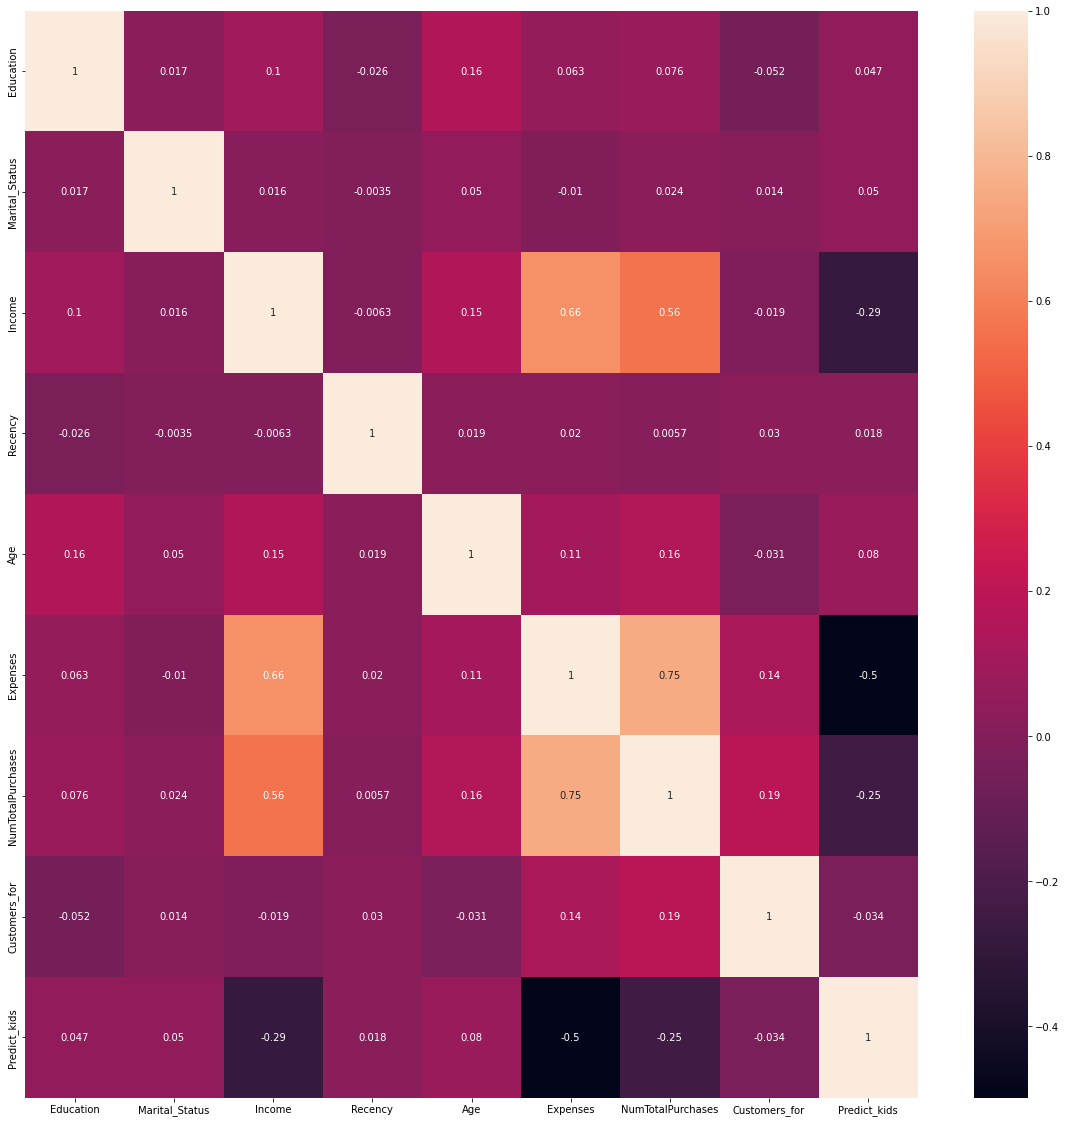

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Education          2240 non-null   int64
 1   Marital_Status     2240 non-null   int64
 2   Income             2240 non-null   int64
 3   Recency            2240 non-null   int64
 4   Age                2240 non-null   int64
 5   Expenses           2240 non-null   int64
 6   NumTotalPurchases  2240 non-null   int64
 7   Customers_for      2240 non-null   int64
 8   Predict_kids       2240 non-null   int64
dtypes: int64(9)
memory usage: 157.6 KB


In [22]:
df.nunique()

Education               5
Marital_Status          3
Income                 15
Recency               100
Age                     9
Expenses             1054
NumTotalPurchases      39
Customers_for          36
Predict_kids            4
dtype: int64

In [23]:
data=df.values.tolist()

In [24]:


def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1.2
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation
 
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
 
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))
 
# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
	n_inputs = len(train[0]) - 1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs, n_hidden, n_outputs)
	train_network(network, train, l_rate, n_epoch, n_outputs)
	predictions = list()
	for row in test:
		prediction = predict(network, row)
		predictions.append(prediction)
	return(predictions) 




In [25]:
# Test Backprop on Seeds dataset
seed(1)

# load and prepare data
dataset = data
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.3
n_epoch = 50
n_hidden = 8

In [26]:
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Accuracy: %.3f%%' % (max(scores)))

Scores: [74.19642857142819, 78.48214285714243, 77.94642857142816, 75.53571428571388, 77.41071428571387]
Accuracy: 78.482%


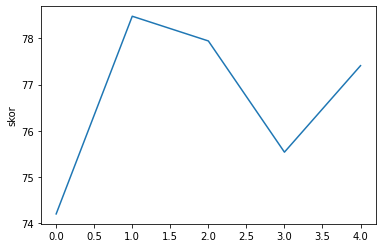

In [27]:
plt.plot(scores)
plt.ylabel('skor')

plt.show()